# Handling missing value

For categorical variable

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For data processing and maths
import numpy as np
import pandas as pd
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


# 2)-Loading data

In [3]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


"NaN" is not a string, rather it's a special value: numpy.nan

In [4]:
ufo.shape

(18241, 5)

In [5]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.6+ KB


# 3)-Data Exploration

In [6]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(ufo)
table_dtype

,Data Type
City,object
Colors Reported,object
Shape Reported,object
State,object
Time,object


# 4)- Checking misisng values

In [7]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [8]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


# 4.1)- Checking whole dataset for missing values

In [9]:
# count the number of missing values in each Series
ufo.isnull().sum() # axis=0 by default.

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

The sum method for a DataFrame operates on axis=0 by default (and thus produces column sums).

### 4.2)- Checking missing entities visually

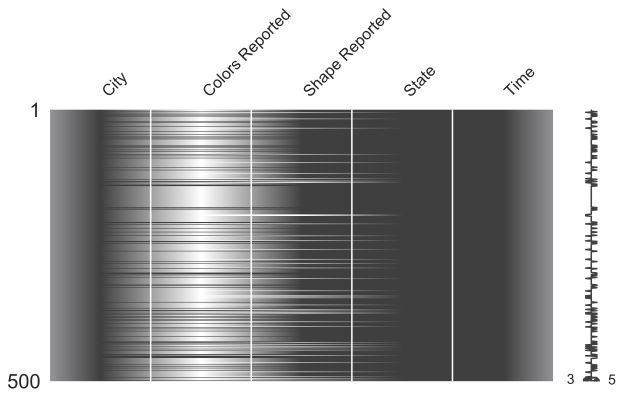

In [10]:
import missingno as msno

msno.matrix(ufo.tail(500), #Last 500 values. Sampe can be used as for random values
            figsize=(10, 5),
            width_ratios=(15, 1))

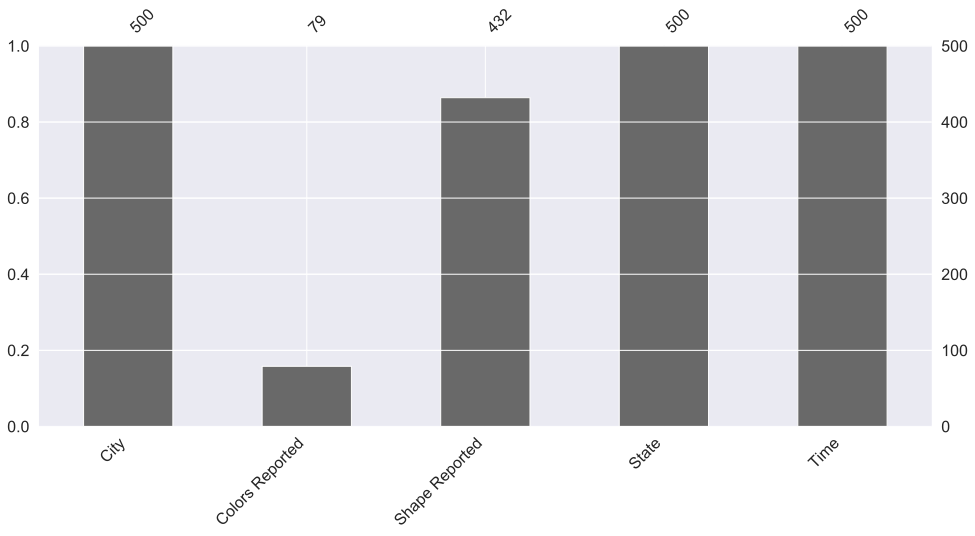

In [11]:
msno.bar(ufo.sample(500),
            figsize=(16, 7),)

In [12]:
### 4.3)-make a function to check all

def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [13]:
missing_values = find_missing_values(ufo, columns=ufo.columns)
missing_values

Number of missing or NaN values for each column:


{'City': 25,
 'Colors Reported': 15359,
 'Shape Reported': 2644,
 'State': 0,
 'Time': 0}

### 4.4)-filter the DataFrame rows

shows all "NaN" is City variable

In [14]:
# use the 'isnull' Series method to filter the DataFrame rows. 
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [15]:
ufo.shape

(18241, 5)

In [16]:
ufo[ufo.City.isnull()].shape

(25, 5)

Notice it has filtered all missing values

# 5)- Options to solve Problem

- drop all missing values
- fill missing values
- make a ML problem and create a train set to predict missing value

### 5a)- Drop missing entities

In [17]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

In [18]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [19]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [20]:
missing_values

{'City': 25,
 'Colors Reported': 15359,
 'Shape Reported': 2644,
 'State': 0,
 'Time': 0}

As variable "state" and "time" has no missing values. So, our results remain unchanged for "how=all" option

In [21]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [22]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

### 5b)-Filling missing entities

In [23]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [24]:
#explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

NaN         2644

In [25]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [26]:
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64